In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

In [5]:
super_sent_by_user = super_tree.groupby("user_id").count()[["action"]].rename(columns={"action": "super_sent"})
free_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] == 1].reset_index()

paid_super_sent_users = super_sent_by_user.copy().rename(columns={"super_sent": "paid_super_sent"})
paid_super_sent_users["paid_super_sent"] = paid_super_sent_users["paid_super_sent"] - 1
paid_super_sent_users = paid_super_sent_users[paid_super_sent_users.paid_super_sent > 0].reset_index()

free_sent_users = free_tree.groupby("user_id").count()[["action"]].rename(columns={"action":"free_sent"})
free_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] == 1].reset_index()
all_active_users = free_sent_users.merge(super_sent_by_user, how="outer", left_on="user_id", right_on="user_id").reset_index()
active_free_users = free_sent_users.merge(free_super_sent_users, how="outer", left_on="user_id", right_on="user_id")

no_free_sent_only_paid_sent = free_sent_users.merge(paid_super_sent_users, how="right", on="user_id")
no_free_sent_only_paid_sent = no_free_sent_only_paid_sent[no_free_sent_only_paid_sent.free_sent.isna()]

reg_free = registration.merge(free_tree, how="inner", left_on="user_id", right_on="user_id")
reg_super = registration.merge(super_tree, how="inner", left_on="user_id", right_on="user_id")
paid_users = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")

In [120]:
reg_by_day = registration.groupby("date")[["user_id"]].count().reset_index().rename(columns={"user_id":"user_counts"})
reg_by_day

,date,user_counts
0,2023-10-13,104
1,2023-10-14,86
2,2023-10-15,82
3,2023-10-16,115
4,2023-10-17,112
...,...,...
268,2024-07-07,3590
269,2024-07-08,4616
270,2024-07-09,4735
271,2024-07-10,4866


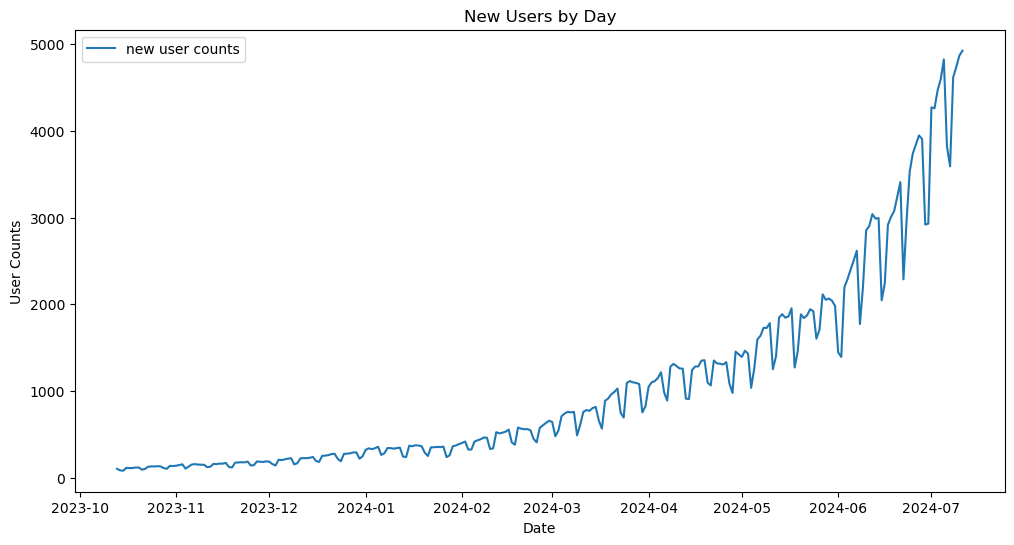

In [156]:
x = reg_by_day.date
y = reg_by_day.user_counts

plt.figure(figsize=(12, 6))
plt.plot(x, y, label="new user counts")
plt.xlabel("Date")
plt.ylabel("User Counts")
plt.title("New Users by Day")
plt.legend()
plt.show()

In [122]:
from datetime import timedelta

last_day = registration.date.max()
last_week = last_day - timedelta(days=7)

reg_last_week = registration[registration.date > last_week]
last_week_registration = reg_last_week.groupby("date").count()[["user_id"]].reset_index().rename(columns={"user_id":"registration"})
last_week_registration

,date,registration
0,2024-07-05,4822
1,2024-07-06,3818
2,2024-07-07,3590
3,2024-07-08,4616
4,2024-07-09,4735
5,2024-07-10,4866
6,2024-07-11,4922


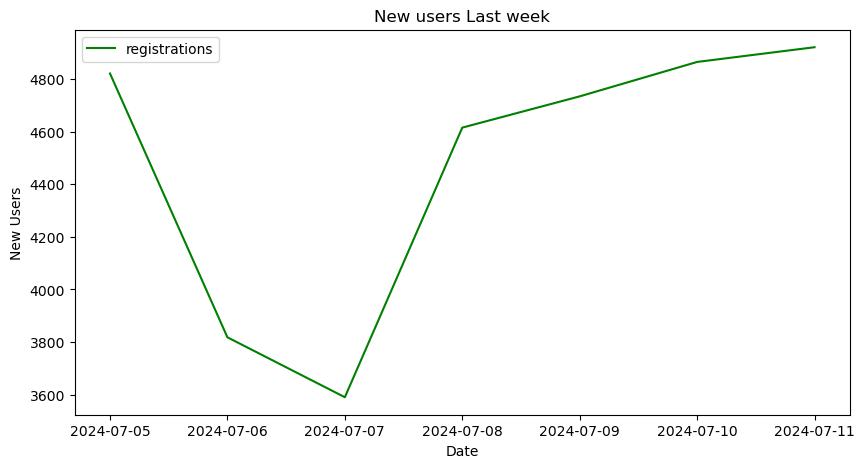

In [123]:
x = last_week_registration.date
y = last_week_registration.registration

lwday = last_day - timedelta(days=6)
if last_week_registration[last_week_registration.date == lwday].registration.item() > last_week_registration[last_week_registration.date == last_day].registration.item():
    szin="red"
else:
    szin="green"

plt.figure(figsize=(10,5))
plt.plot(x, y, label="registrations", color=szin)
plt.xlabel("Date")
plt.ylabel("New Users")
plt.title("New users Last week")
plt.legend()
plt.show()

In [124]:
free_tree_sent = free_tree.groupby("date").count()[["user_id"]].reset_index().rename(columns={"user_id":"free_sent"})
free_tree_sent

,date,free_sent
0,2023-10-13,298
1,2023-10-14,414
2,2023-10-15,480
3,2023-10-16,673
4,2023-10-17,686
...,...,...
268,2024-07-07,37039
269,2024-07-08,39742
270,2024-07-09,42244
271,2024-07-10,43098


In [131]:
super_tree_sent = super_tree.groupby("date").count()[["user_id"]].reset_index().rename(columns={"user_id":"super_sent"})
super_tree_sent

,date,super_sent
0,2023-10-13,35
1,2023-10-14,38
2,2023-10-15,50
3,2023-10-16,63
4,2023-10-17,76
...,...,...
268,2024-07-07,2473
269,2024-07-08,2648
270,2024-07-09,2923
271,2024-07-10,3076


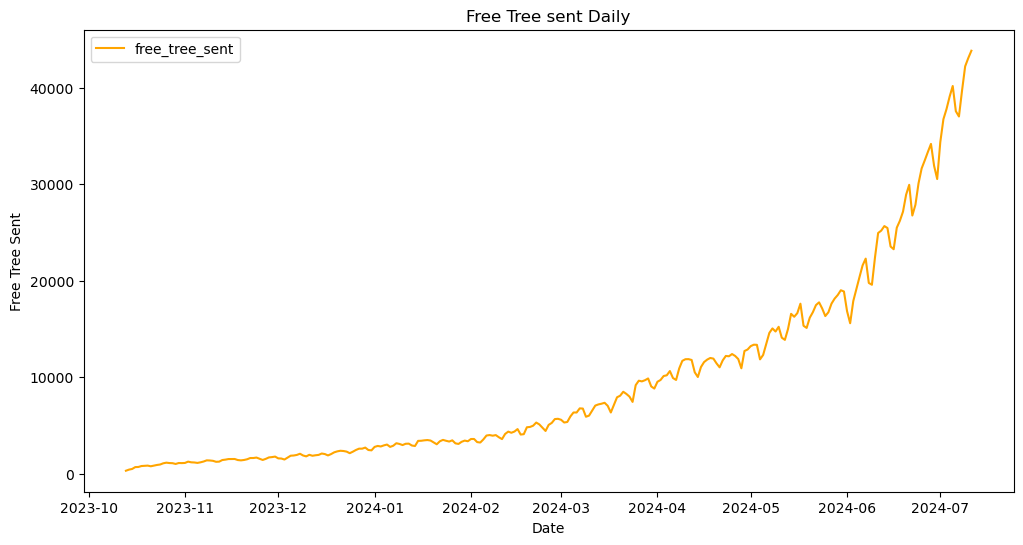

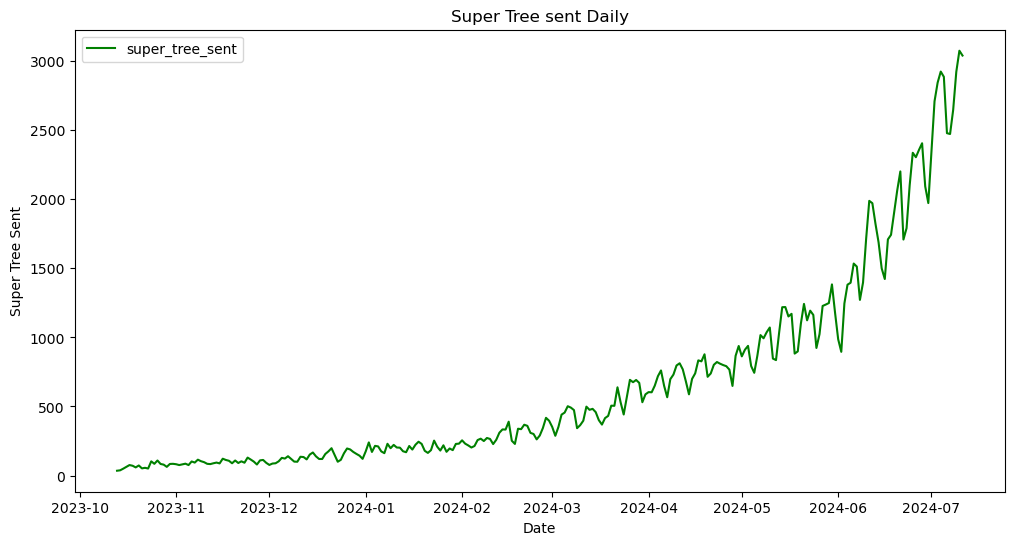

In [157]:
free_tree_sent["date"] = pd.to_datetime(free_tree_sent["date"])

x = free_tree_sent.date
y = free_tree_sent.free_sent

super_tree_sent["date"] = pd.to_datetime(super_tree_sent["date"])

x2 = super_tree_sent.date
y2 = super_tree_sent.super_sent

plt.figure(figsize=(12,6))
plt.plot(x, y, label="free_tree_sent",color="orange")
plt.xlabel("Date")
plt.ylabel("Free Tree Sent")
plt.title("Free Tree sent Daily")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x2, y2, label="super_tree_sent",color="green")
plt.xlabel("Date")
plt.ylabel("Super Tree Sent")
plt.title("Super Tree sent Daily")
plt.legend()
plt.show()

In [160]:
active_users = free_tree.merge(super_tree, how="outer", on=["day", "date", "user_id", "action"])
active_users_date = active_users.groupby("date").nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})
active_users_date

,date,user_count
0,2023-10-13,79
1,2023-10-14,132
2,2023-10-15,155
3,2023-10-16,216
4,2023-10-17,254
...,...,...
268,2024-07-07,20060
269,2024-07-08,20711
270,2024-07-09,21399
271,2024-07-10,22208


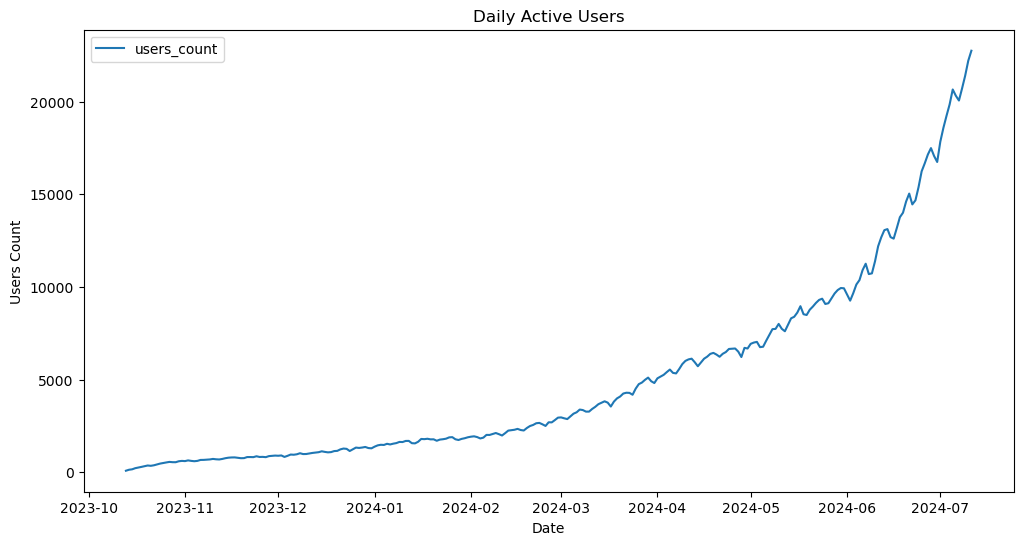

In [162]:
active_users_date["date"] = pd.to_datetime(active_users_date["date"])

x = active_users_date.date
y = active_users_date.user_count

plt.figure(figsize=(12,6))
plt.plot(x, y, label="users_count")
plt.xlabel("Date")
plt.ylabel("Users Count")
plt.title("Daily Active Users")
plt.legend()
plt.show()

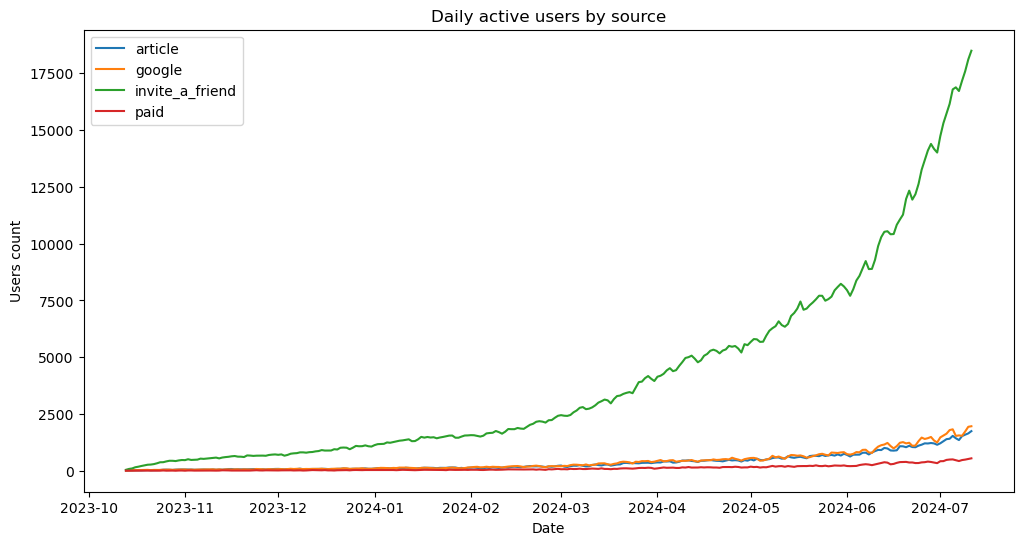

In [7]:
active_users_list = free_tree.merge(super_tree, how="outer", on=["day", "date", "user_id", "action"])
active_user_reg = active_users_list.merge(registration, how="inner", on="user_id")
active_users_acquire_from_date = active_user_reg.groupby(["acquired_from", "date_x"]).nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count", "date_x":"date"})

sources = active_users_acquire_from_date["acquired_from"].unique()

plt.figure(figsize=(12, 6))

# Loop over each unique source
for source in sources:
    data_source = active_users_acquire_from_date[active_users_acquire_from_date.acquired_from == source]
    
    # Plot the line for each source
    plt.plot(data_source.date, data_source.user_count, label=source)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Users count")
plt.title("Daily active users by source")
plt.legend()
plt.show()

In [167]:
Today_active_users = active_users_date[active_users_date.date == active_users_date.date.max()]["user_count"].item()
print(f"Active users today: {Today_active_users}")

Active users today: 22748
